In [272]:
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [273]:
images = pd.DataFrame([])
images_read = 0
for file_name in os.listdir('cars_train'):
    image = np.asarray(Image.open(os.path.join('cars_train', file_name)).resize((500,500)).convert("L"))
    image = pd.Series(image.flatten(), name=file_name)
    images = images.append(image)
    images_read +=1
    if images_read == 300:
        break

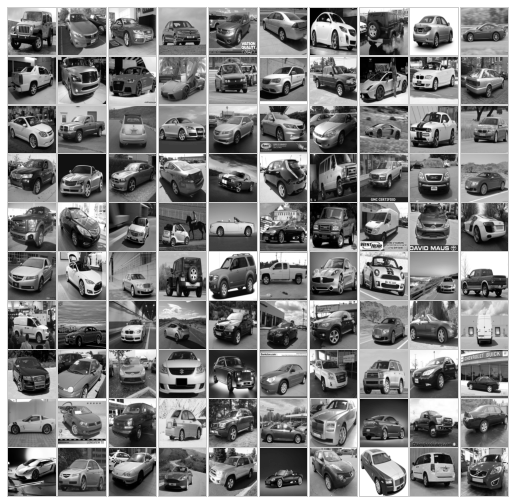

In [274]:
fig, axes = plt.subplots(10,10,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(images.iloc[i].values.reshape(500,500),cmap='gray')

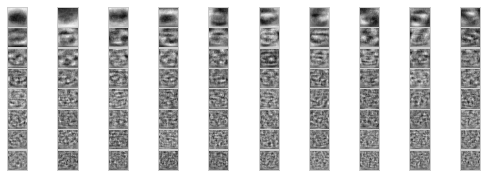

In [275]:
cars_pca = PCA(.96)
cars_pca.fit_transform(images)

fig, axes = plt.subplots(8,10,figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(cars_pca.components_[i].reshape(500,500),cmap='gray')

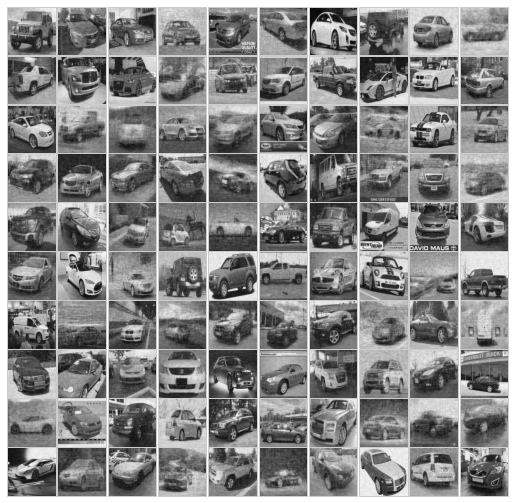

In [277]:
components = cars_pca.transform(images)
projected = cars_pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(500,500),cmap="gray")

In [280]:
len(cars_pca.components_)

213